# Chapter 17: Geometric algorithms - Convex Hull

The convex hull of a set of points, is the smallest convex polygon for which each point in the set is either on the boundary of the polygon or in its interior.

We can visualize what the convex hull looks like by imagining that the points are nails sticking out of the plane.
Take an elastic rubber band, stretch it around the nails and let it go.
It will snap around the nails and assume a shape that minimizes its length.
The area enclosed by the rubber band is called the convex hull of the points.
This leads to an alternative definition of the convex hull of a finite set of points in the plane: it is the unique convex polygon whose vertices are points from and which contains all points.

![Convex hull](../images/17_convexhull.gif "Source: Université de Montréal")

---

## Jarvis's march

*Jarvis’s march* computes the convex hull of a set Q of points by a technique also known as the *gift wrapping algorithm*.
The algorithm was named after R. A. Jarvis, who published it in 1973.

The algorithm simulates wrapping a piece of paper around the set of points.
We start by taping the end of the paper to the lowest point in the set, that is, the point with the lowest Y-coordinate, picking the leftmost such point in case of a tie.
We know that this point must be a vertex of the convex hull.
We pull the paper to the right to make it wrapping "tight"
and then we pull it higher until it touches a point.
This point must also be a vertex of the convex hull.
Keeping the paper "tight", we continue in this way around the set of vertices until we come back to our original starting point.

![Jarvis march](../images/17_jarvis_march.gif "Source: Wikipedia")

The algoirhtm has an $O(n * h)$ asymptotic complexity, where $n$ is the number of points and $h$ is the number of points on the convex hull.

### Orientation

Given line *(A, B)* and point *M*, check whether M is left or right from the line, 
more precisely  whether *A -> B -> M* is a closckwise or counter-clockwise turn?

$$det := (Bx - Ax) * (My - Ay) - (By - Ay) * (Mx - Ax)$$

- if $det >  0$: counter-clockwise
- if $det <  0$: clockwise
- if $det = 0$: collinear

---

## Graham's scan

Graham’s scan solves the convex-hull problem by maintaining a stack of candidate points.
It pushes each point of the input set onto the stack one time, and it eventually pops from the stack each point that is not a vertex of the convex hull.
When the algorithm terminates, the stack contains exactly the vertices of the convex hull, in counter-clockwise order of their appearance on the boundary.
The algorithm is named after Ronald Graham, who published the original version in 1972.

The algorithm consists of 3 steps:
 1. Find the point with the lowest Y-coordinate, picking the leftmost such point in case of a tie.
Call this point $P$.
 2. The set of points must be sorted in increasing order of the angle they and the point $P$ make with the X-axis. (Sorting algorithm were discussed in [Chapter 6](06_sorting.ipynb).)
 3. Initiate an empty stack. Then consider each points in the sorted list in sequence iteratively. For each point, it is first determined whether traveling from the two points immediately preceding this point constitutes making a left turn or a right turn in orientation.
    - If a left turn, push the point onto the stack.
    - If a right turn, the second-to-last point is not part of the convex hull (lies inside it), and is therefore removed from the stack. The same determination is then made for the set of the latest point, and the two points that immediately precede the point found to have been inside the hull, and is repeated until a left turn set is encountered, at which point the algorithm moves on to the next point in the set of points in the sorted list.

![Graham's scan](../images/17_graham_scan.gif "Source: Wikipedia")

The algorithm has an $O(n * log(n)$ asymptotic complexity. Thus, this algorithm is not *output-sensitive* (compare to Jarvis's march).

---

## Quickhull

The *Quickhull* method uses the *divide and conquer* approach similar to that of [Quicksort](06_sorting.ipynb#Quicksort), from which its name derives.
The original algorithm was described by Scott Greenfield in 1990. The algorithm was later extended to work in n-dimensional space.

The algorithm contains the following steps:
 1. Find the points with minimum and maximum X-coordinates, as these will always be part of the convex hull. If case of a tie, pick the ones with minimum/maximum Y-coordinates correspondingly.
 2. Use the line formed by these two points to divide the set in two subsets of points, which will be processed recursively (*"divide and conquer"*).
 3. For both sides, determine the point with the maximum distance from the line. This point forms a triangle with those of the line. The points lying inside of that triangle cannot be part of the convex hull and can therefore be ignored in the next steps.
 4. Repeat the previous step on the two lines formed by the triangle.
 5. Continue the recursion until no more points are left. In the end, all points selected constitute the convex hull.

![Quickhull](../images/17_quickhull.gif "Source: Wikipedia")

The asymptotic complexity of the algorithm is $O(n * log(r))$, where $r$ is the number of processed points.

---

## Chan's algorithm

Chan's algorithm is an optimal *output-sensitive algorithm* to compute the convex hull. It was named after Timothy M. Chan, who published the algorithm in 1996.

The algorithm combines Graham's scan (or other algorithm with $O(n * log(n))$ complexity) with Jarvis's march ($O(n*h)$), in order to obtain an optimal $O(n * log(h))$ complexity, where $n$ is the number of points and $h$ is the number of vertices of the output (the convex hull).

![Chan's algorithm](../images/17_chan_algorithm.gif "Source: Wikipedia")

---

## Quickhull with Python

*SciPy* (pronounced "Sigh Pie") is library used for scientific computing and technical computing for mathematics, science, and engineering. 
*SciPy* is built on top of *NumPy*, *Matplotlib* and *Pandas* and are tightly integrated with them. It is one of the most widely used Python package in the scientific community.

### How to install *SciPy*?

If you have Anaconda installed, then `scipy` was already installed together with it.

If you have a standalone Python3 and Jupyter Notebook installation, open a command prompt / terminal and type in:
```
pip3 install scipy
```

### How to use *SciPy*?

*SciPy* consists of sub-packages for various scientific areas. For us the `spatial` package is in focus, which contains spatial algorithms, like the *QuickHull* or the *KdTree* (see [Chapter 16](16_spatial_indexing.ipynb)).

```python
import scipy.spatial
```

---

Read the `hungary_cities.shp` shapefile located in the `data` folder.
This dataset contains both scalar and spatial data of the Hungarian cities, and should be familiar from [Chapter 15](15_graph_spanning_tree.ipynb).

In [1]:
import geopandas as gpd
from scipy.spatial import ConvexHull

cities_gdf = gpd.read_file('../data/hungary_cities.shp')
display(cities_gdf)

,Id,County,City,Status,KSH,geometry
0,1,FEJÉR,Aba,town,17376,POINT (610046.800 187639.000)
1,2,BARANYA,Abaliget,town,12548,POINT (577946.100 89280.800)
2,3,HEVES,Abasár,town,24554,POINT (721963.700 273880.300)
3,4,BORSOD-ABAUJ-ZEMPLÉN,Abaújalpár,town,15662,POINT (812129.200 331508.200)
4,5,BORSOD-ABAUJ-ZEMPLÉN,Abaújkér,town,26718,POINT (809795.600 331138.300)
...,...,...,...,...,...,...
3142,3143,GYÕR-MOSON-SOPRON,Zsira,town,04622,POINT (471324.200 237577.200)
3143,3144,CSONGRÁD,Zsombó,town,17765,POINT (721098.100 109690.000)
3144,3145,BORSOD-ABAUJ-ZEMPLÉN,Zsujta,town,11022,POINT (815027.400 353143.100)
3145,3146,SZABOLCS-SZATMÁR-BEREG,Zsurk,town,13037,POINT (884847.700 344952.800)


Fetch points for cities:

In [2]:
points = [(geom.x, geom.y) for geom in cities_gdf.geometry]
print("Number of points: {0}".format(len(points)))

Number of points: 3147


Calculate convex hull:

In [3]:
hull = ConvexHull(points)
print("Number of vertices on hull: {0}".format(len(hull.vertices)))
print("Hull vertices: {0}".format(hull.vertices))

Number of vertices on hull: 25
Hull vertices: [  93  783  853 2847 1289 3115  334  198  782  635 3108 1245  257 1845
  204  601 1575  849 1589 2892 2769 3145 2222 2844 2247]


Plot figure:

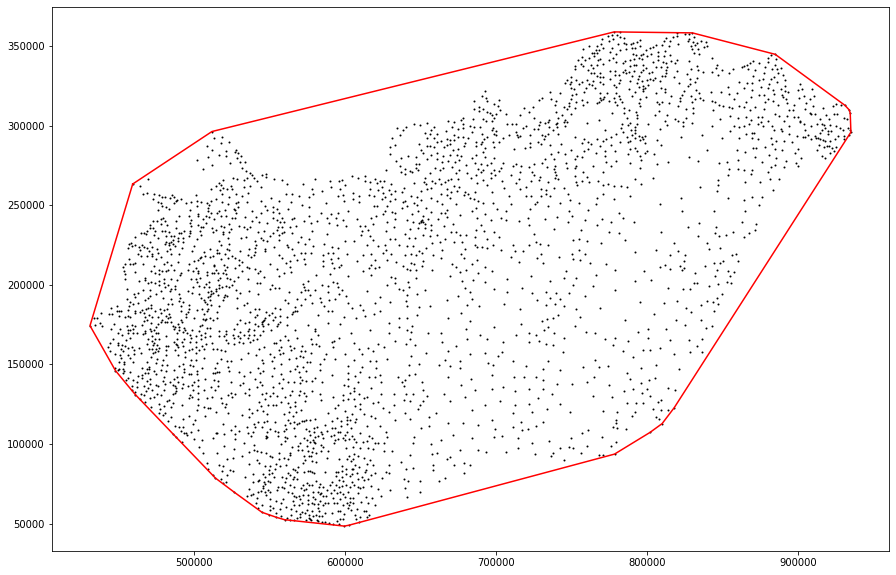

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[15, 10])

# Add all points to plot
for point in points:
    plt.plot(point[0], point[1], color='black', marker='o', markersize=1)

# Calculate convex hull linestring
line_x = [points[idx][0] for idx in hull.vertices]
line_y = [points[idx][1] for idx in hull.vertices]
# Add first point of hull to the end, so the linestring will be closed.
line_x.append(points[hull.vertices[0]][0]) 
line_y.append(points[hull.vertices[0]][1]) 
# Plot linestring
plt.plot(line_x, line_y, color='red')
  
# Display plot
plt.show()